# Projeto 1 Ciência dos Dados

# De que maneira o nível de Produção de Eletricidade e o acesso da população à  uma fonte de Água Renovável influencia no IDH de um país?

Neste projeto serão relacionados o IDH de um país, a sua Produção de Eletricidade e a disponibilidade de Água renovável, a fim de chegar a uma conclusão a respeito da correlação desses três fatores. Todos os dados utilizados por essa análise foram retirados do site https://www.gapminder.org. 

# Introdução

A quantidade de Água Renovável parece influenciar diretamente no IDH da população devido a sua fundamental importância para a vida humana tanto em sua utilização básica de ser consumida quanto na sua utilização na produção de plantios e criação de animais. Porém para ter certeza se influencia ou não iremos analizar os dados estatisticamente para poder responder nossa pergunta, o mesmo vale para a Produção de Eletricidade.

# Import de Dados

In [125]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

% matplotlib inline

idh = pd.read_excel('hdi_human_development_index.xlsx')
elec = pd.read_excel('electricity_generation_total.xlsx')
water = pd.read_excel('renewable_water_cu_meters_per_person.xlsx')


# Coletando apenas os dados de 2007

In [126]:
idh_2007 = idh.loc[:, ['Países', 2007]]
idh_idx = idh_2007.set_index('Países')

elec_2007 = elec.loc[:, ['Países', 2007]]
elec_idx = elec_2007.set_index('Países')

water_2007 = water.loc[:, ['Países', 2007]]
water_idx = water_2007.set_index('Países')

water_idx.head()

,2007
Países,
Afghanistan,2520.0
Albania,10000.0
Algeria,341.0
Andorra,3720.0
Angola,7740.0


# União dos Dados

In [127]:
fin = idh_idx.join(water_idx, how='inner', lsuffix=' IDH', rsuffix=' Água')
fin['2007 Eletricidade'] = elec_idx[2007]
final = fin.dropna()
final.head(190)

,2007 IDH,2007 Água,2007 Eletricidade
Países,,,
Algeria,0.697,341.00,3.730000e+10
Argentina,0.792,21900.00,1.150000e+11
Australia,0.921,23500.00,2.430000e+11
Austria,0.864,9360.00,6.490000e+10
Azerbaijan,0.719,3960.00,2.180000e+10
Bangladesh,0.520,8370.00,3.100000e+10
Belarus,0.755,6060.00,3.180000e+10
Belgium,0.874,1710.00,8.880000e+10
Brazil,0.704,44900.00,4.450000e+11


Giovanni Cardoso Pertence dos Santos

In [128]:
final.describe()

,2007 IDH,2007 Água,2007 Eletricidade
count,60.000000,60.000000,6.000000e+01
mean,0.785250,14400.168000,1.737213e+11
std,0.099857,21909.600761,2.291956e+11
min,0.513000,7.880000,7.680000e+09
25%,0.713250,1807.500000,4.642500e+10
50%,0.798000,5455.000000,8.460000e+10
75%,0.874500,12475.000000,1.927500e+11
max,0.936000,88000.000000,1.180000e+12


In [129]:
#Função do coeficiente de assimetria
def F_c(d):
    q1=d.quantile(0.25)
    md=d.quantile(0.5)
    q3=d.quantile(0.75)
    a=((q3-md)-(md-q1))/(q3-q1)
    return a
idh_2007 = final['2007 IDH']
agua_2007 = final['2007 Água']
eletricidade_2007 = final['2007 Eletricidade']

as_idh = F_c(idh_2007)
as_agua = F_c(agua_2007)
as_eletricidade = F_c(eletricidade_2007)
dic_as = {'IDH': as_idh,'Água' : as_agua, 'Eletricidade' : as_eletricidade}

for e in dic_as:
    print('Coef. de Assimetria ({0}): {1:.5f}'.format(e, dic_as[e]))

Coef. de Assimetria (IDH): -0.05116
Coef. de Assimetria (Água): 0.31615
Coef. de Assimetria (Eletricidade): 0.47822


Correlação entre Água e IDH: 0.11892510405722483
Correlação entre Eletricidade e IDH: 0.22483054429669744


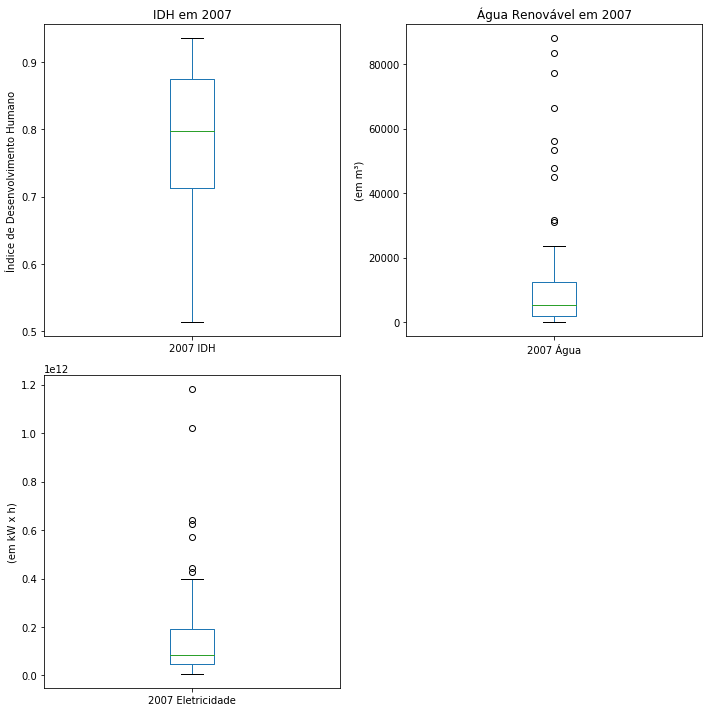

In [130]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(221)
idh_2007.plot(kind='box')
plt.title('IDH em 2007')
plt.ylabel('Índice de Desenvolvimento Humano')

plt.subplot(222)
agua_2007.plot(kind='box')
plt.title('Água Renovável em 2007')
plt.ylabel('(em m³)')

plt.subplot(223)
eletricidade_2007.plot(kind='box')
plt.ylabel('(em kW x h)')

plt.tight_layout()
plt.show

#Correlação entre idh e água
corr_0 = final.corr(method = 'pearson')['2007 Água']['2007 IDH']

#Correlação entre idh e energia
corr_1 = final.corr(method = 'pearson')['2007 Eletricidade']['2007 IDH']

print('Correlação entre Água e IDH: {0}'.format(corr_0))

print('Correlação entre Eletricidade e IDH: {0}'.format(corr_1))

As distribuições apresentadas pelos gráficos nos mostram que apenas o IDH possui distribuição próxima a simétrica enquanto que a quantidade de Água Renovável e a Eletricidade Produzida possuem distribuições um tanto quanto assimétricas.

R² de Água e IDH: 0.014143180375021746
R² de Eletricidade e IDH: 0.05054877364874922
Ajuste linear entre Água e IDH:
Coeficiente linear: 0.7774448102121966
Coeficiente angular: 5.420207450221037e-07


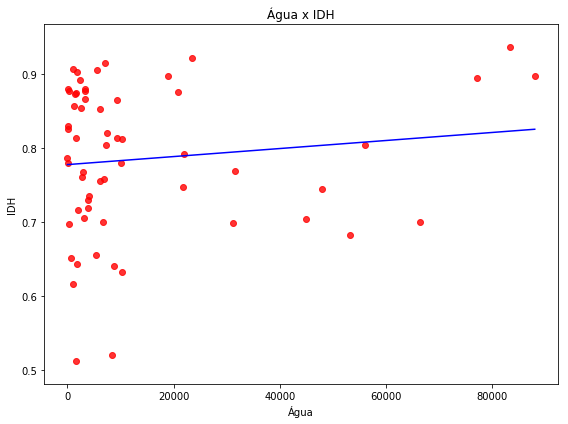

Ajuste linear entre Eletricidade e IDH:
Coeficiente linear: 0.7682331537817786
Coeficiente angular: 9.795484464518707e-14


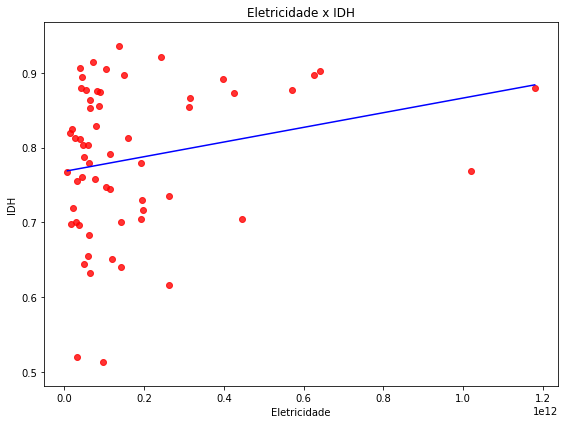

Ajuste linear entre Eletricidade e Água:
Coeficiente linear: 13038.800307057814
Coeficiente angular: 7.836502672530248e-09


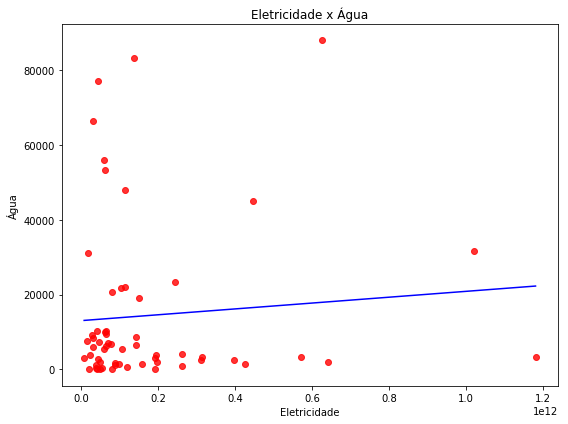

In [131]:
#Utilizei o linregress para descobrir o R² do seguinte site: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html
#Também foi utilizado a função feita por um professor do seguinte site: https://pastebin.com/0KcDyqKq

def reta(dados_x, dados_y, eixo_x, eixo_y, titulo, n):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre {0} e {1}:'.format(eixo_x, eixo_y))
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(titulo)
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()
    
slope0, intercept0, r_value0, p_value0, std_err0 = stats.linregress(agua_2007, idh_2007)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(eletricidade_2007, idh_2007)

print('R² de Água e IDH: {0}'.format(r_value0**2))
print('R² de Eletricidade e IDH: {0}'.format(r_value1**2))

reta(agua_2007, idh_2007, 'Água', 'IDH', 'Água x IDH', 121)

reta(eletricidade_2007, idh_2007, 'Eletricidade', 'IDH', 'Eletricidade x IDH', 122)

reta(eletricidade_2007, agua_2007, 'Eletricidade', 'Água', 'Eletricidade x Água', 123)

Comforme os gráficos acima mostram, todas as disperções são positivas e é possível assumir que a Água e a Eletricidade não influenciam o IDH de uma forma direta nem indireta.

# Conclusão

Com todos os dados coletados e utilizados, é possível responder a pergunta feita : "De que maneira o nível de produção de Energia e o acesso da população à uma fonte de Água Renovável influencia no IDH de um país?".

Analizando estes dados percebemos que a resposta é nenhuma, pois a produção de Energia e a quantidade de Água Renovável não influencia no IDH de um país. Isso se da pelo fato que os valores obtidos pelo método dos múltiplos quadrados estão muito próximos de zero.
